파이썬 머신러닝 완벽가이드 ch4. 7, 8, 11

pg. 244 ~ 267, 295 ~ 306

---

#**04. 분류**

04-07. Light GBM
- LightGBM 설치
- LightGBM 하이퍼 파라미터
- 하이퍼 파라미터 튜닝 방안
- 파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 비교
- LightGBM 적용 - 위스콘신 유방암 예측

04-08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝
- 하이퍼 파라미터 튜닝
- 베이지안 최적화 개요
- HyperOpt 사용하기
- HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화

04-11. 스태킹 앙상블
- 기본 스태킹 모델
- CV 세트 기반의 스태킹

---

###**04-07. Light GBM**
- LightGBM의 리프 중심 트리 분할(Leaf Wise) 방식
   - 균형 트리 분할(Level Wise): 기존의 대부분 트리 기반 알고리즘이 트리의 깊이를 효과적으로 줄이기 위해 사용하는 방법. 오버피팅에 강한 구조. BUT, 균형을 맞추기 위한 시간이 필요함.
   - 리프 중심 트리 분할(Leaf Wise): 트리의 균형을 맞추지 않고, 최대 손실 값(max delta loss)를 가지는 리프 노드를 지속적으로 분할하는 방법. 트리의 깊이가 깊어지고 비대칭적인 규칙 트리가 생성되지만, 결국은 학습을 반복할수록 균형 트리 분할 방식보다 예측 오류 손실을 최소화할 수 있음.



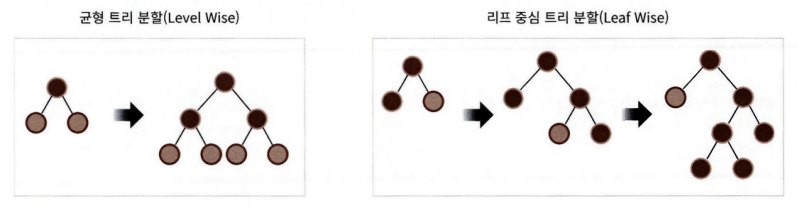

- LightGBM의 XGBoost 대비 장점
   - 더 빠른 학습과 예측 수행 시간.
   - 더 작은 메모리 사용량.
   - 카테고리형 피처의 자동 변환과 최적 분할(원-핫 인코딩 등을 사용하지 않고도 카테고리형 피처를 최적으로 변환하고 이에 따른 노드 분할 수행).
  
- LightGBM의 단점
   - 10,000건 이하의 적은 데이터 세트에 적용할 경우 과적합이 발생하기 쉬움.

- 파이썬 래퍼용 LightGBM과 사이킷런 래퍼용 LightGBM
   - 패키지명: lightgbm
   - 사이킷런 래퍼 클래스: LGBMClassifier, LGBMRegressor

**LightGBM 하이퍼 파라미터**

Xgboost와 많은 부분이 유사. 다만, LightGBM은 Xgboost와 다르게 max_depth를 매우 크게 갖기 때문에 이런 트리 특성에 맞는 하이퍼 파라미터 설정이 필요.
- 주요 파라미터
   - num_iterations [default = 100] : 반복수행하려는 트리의 개수. 사이킷런 호환 클래스의 n_estimators와 같은 파라미터
   - learning_rate [default = 0.1] : 부스팅 스텝을 반복적으로 수행할 때 업데이터되는 학습률 값
   - max_depth [default=—1] : 0보다 작은 값을 지정하면 깊이에 제한이 없음.
   - min_data_in_leaf [default=20] : 최종 결정 클래스인 리프 노드가 되기 위해서 최소한으로 필요한 레코드 수. 과적합 제어 파라미터. min_samples_leaf, min_child_samples
   - num_leaves [default=31] : 하나의 트리가 가질 수 있는 최대 리프 개수
   - boosting [default=gbdt] : 부스팅 트리를 생성하는 알고리즘 종류, gbdt(일반적인 그래디언트 부스팅 결정 트리) 또는 rf(랜덤 포레스트).
   - bagging_fraction [default=1.0] : 데이터를 샘플링하는 비율. 과적합 제어 파라미터. subsample
   - feature_fraction [default=1.0] : 개별 트리를 학습할 때마다 무작위로 선택하는 피처의 비율. 과적합 제어 파라미터. max_features, colsample_bytree
   - lambda_I2  [default=0.0] : L2 regulation 제어를 위한 값. 과적합 제어 파라미터. reg_lambda
   - lambda_I1  [default=0.0] : L1 regulation 제어를 위한 값. 과적합 제어 파라미터. reg_alpha
- Learning Task 파라미터
   - objective: 최솟값을 가져야할 손실함수. 회귀, 다중 클래스 분류, 이진 분류인지에 따라 지정됨.  

**하이퍼 파라미터 튜닝 방안**

num_leaves 개수를 중심으로, min_data_in_leaf (min_child_samples), max_depth를 함께 조정하면서 모델의 복잡도를 줄임. learning_rate를 작게 하면서 n_estimators를 크게 하는 것도 좋음. 또한, reg_lambda, reg_alpha같은 regularization을 적용하거나 colsample_tree, subsample 파라미터로 학습 데이터에 사용할 피처의 개수나 데이터 샘플링 레코드 개수를 줄임으로써 과적합을 제어할 수 있음.


**파이썬 래퍼 LightGBM과 사이킷런 래퍼 XGBoost, LightGBM 하이퍼 파라미터 정리표**

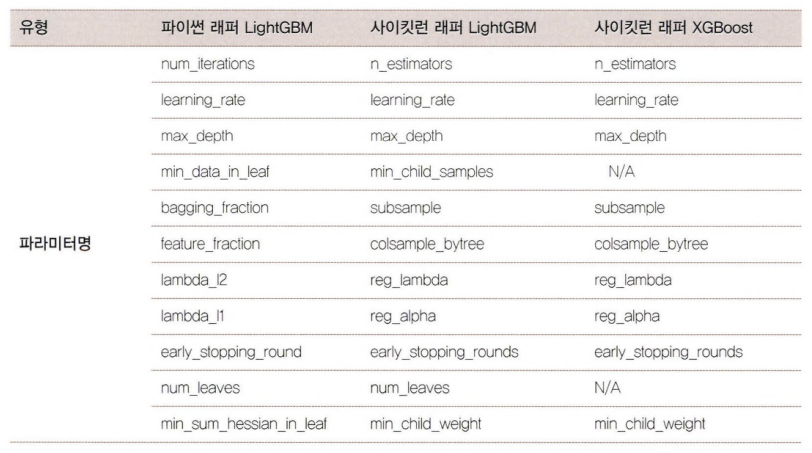

**LightGBM 설치**

In [1]:
pip install lightgbm==3.3.2

In [2]:
import lightgbm
from lightgbm import LGBMClassifier

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


**LightGBM 적용 - 위스콘신 유방암 예측**

In [3]:
# LightGBM의 파이썬 패키지인 lightgbm에서 LGBMClassifier 임포트
from lightgbm import LGBMClassifier

import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

dataset = load_breast_cancer()

cancer_df = pd.DataFrame(data=dataset.data, columns=dataset.feature_names)

cancer_df['target'] = dataset.target
X_features = cancer_df.iloc[:, :-1]
y_label = cancer_df.iloc[:, -1]

# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 위에서 만든 X_train, y_train을 다시 쪼개서 90%는 학습과 10%는 검증용 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

# 앞서 XGBoost와 동일하게 n_estimators는 400 설정.
lgbm_wrapper = LGBMClassifier(n_estimators=400, learning_rate=0.05)

# LightGBM도 XGBoost와 동일하게 조기중단 수행 가능.
evals = [(X_tr, y_tr), (X_val, y_val)]
lgbm_wrapper.fit(X_tr, y_tr, early_stopping_rounds=50, eval_metric='logloss', eval_set=evals, verbose=True)
preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]

/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:726: UserWarning: 'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. Pass 'early_stopping()' callback via 'callbacks' argument instead.
  _log_warning("'early_stopping_rounds' argument is deprecated and will be removed in a future release of LightGBM. "
/usr/local/lib/python3.10/dist-packages/lightgbm/sklearn.py:736: UserWarning: 'verbose' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose' argument is deprecated and will be removed in a future release of LightGBM. "


[1]	training's binary_logloss: 0.625671	valid_1's binary_logloss: 0.628248
[2]	training's binary_logloss: 0.588173	valid_1's binary_logloss: 0.601106
[3]	training's binary_logloss: 0.554518	valid_1's binary_logloss: 0.577587
[4]	training's binary_logloss: 0.523972	valid_1's binary_logloss: 0.556324
[5]	training's binary_logloss: 0.49615	valid_1's binary_logloss: 0.537407
[6]	training's binary_logloss: 0.470108	valid_1's binary_logloss: 0.519401
[7]	training's binary_logloss: 0.446647	valid_1's binary_logloss: 0.502637
[8]	training's binary_logloss: 0.425055	valid_1's binary_logloss: 0.488311
[9]	training's binary_logloss: 0.405125	valid_1's binary_logloss: 0.474664
[10]	training's binary_logloss: 0.386526	valid_1's binary_logloss: 0.461267
[11]	training's binary_logloss: 0.367027	valid_1's binary_logloss: 0.444274
[12]	training's binary_logloss: 0.350713	valid_1's binary_logloss: 0.432755
[13]	training's binary_logloss: 0.334601	valid_1's binary_logloss: 0.421371
[14]	training's binary

111번째의 반복수행에서 학습 중단.

In [4]:
# LightGBM 모델 기반 예측 성능 평가
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, roc_auc_score

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

get_clf_eval(y_test, preds, pred_proba)

오차 행렬
[[34  3]
 [ 2 75]]
정확도: 0.9561, 정밀도: 0.9615, 재현율: 0.9740, F1: 0.9677, AUC:0.9877


<Axes: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

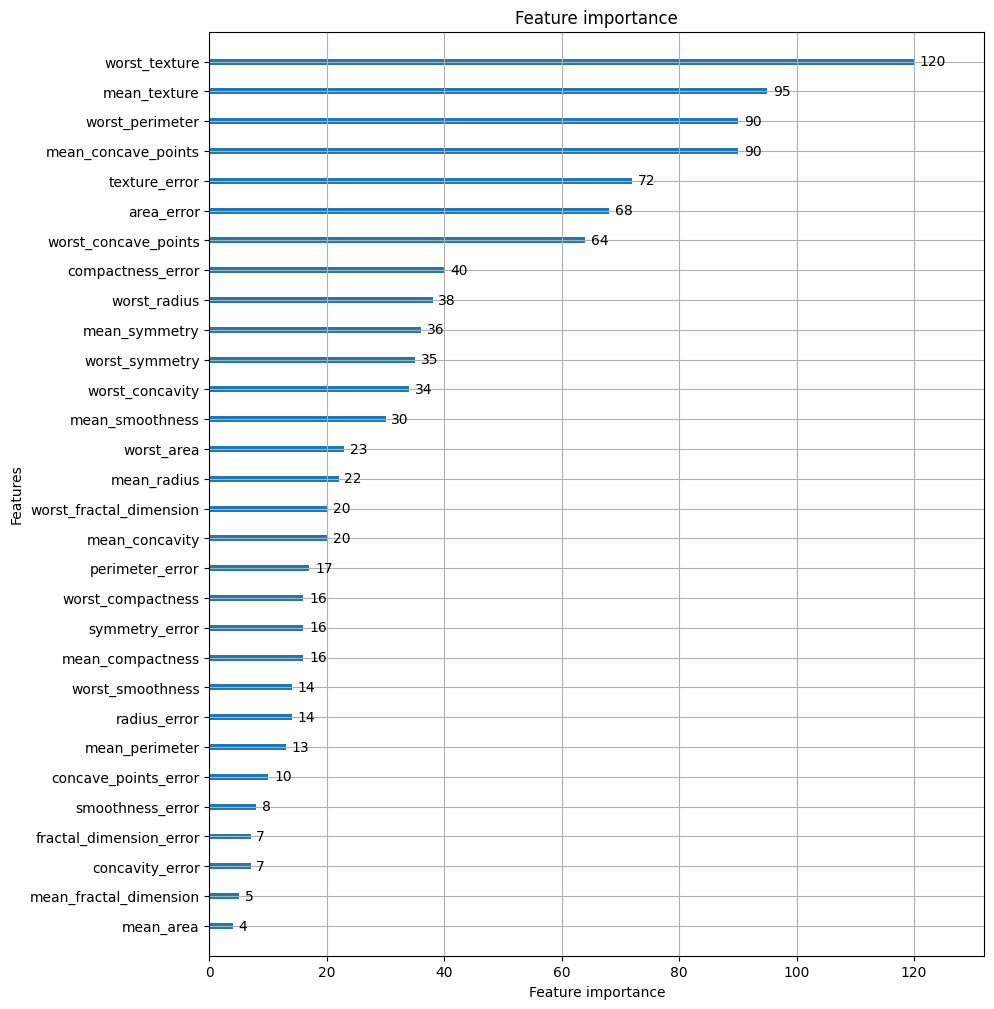

In [5]:
# plot_importance()를 이용하여 feature 중요도 시각화
from lightgbm import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fix, ax = plt.subplots(figsize=(10, 12))
plot_importance(lgbm_wrapper, ax=ax)

###**04-08. 베이지안 최적화 기반의 HyperOpt를 이용한 하이퍼 파라미터 튜닝**

XGBoost나 LightGBM은 성능이 매우 뛰어난 알고리즘이지만, 하이퍼 파라미터 개수가 비교적 많기 때문에 최적 하이퍼 파라미터를 찾는 과정이 필요함. 대용량 학습 데이터에 Grid Search 방식으로 최적 하이퍼 파라미터를 찾으려면 가능한 경우 수의 곱만큼 반복적으로 학습과 평가를 수행해야만 하기 때문에 수행시간이 매우 오래 걸릴 수밖에 없음. 때문에 실무의 대용량 학습 데이터에 XGBoost나 LightGBM의 하이퍼 파라미터 튜닝 시에 Grid Search 방식보다는 다른 방식을 적용하곤 하는데 대표적으로 **베이지안 최적화 기법**이 있음.

In [6]:
# Grid Search 방식은 5x4x5x5x4x3 = 6000회의 학습과 평가를 반복함.
params = {
    'max_depth' == [10, 20, 30, 40, 50],
    'num_leaves'== [ 35, 45, 55, 65],
    'colsample_bytree' == [0.5, 0.6, 0.7, 0.8, 0.9],
    'subsample'== [0.5, 0.6, 0.7, 0.8, 0.9],
    'min_child_weight'== [10, 20, 30, 40],
    'reg_alpha' == [0.01, 0.05, 0.1]
}

**베이지안 최적화 개요**

베이지안 확률이 새로운 사건의 관측이나 새로운 샘플 데이터를 기반으로 사후 확률을 개선해 나가듯이, 베이지안 최적화는 새로운 데이터를 입력받았을 때 최적 함수를 예측하는 사후 모델을 개선해 나가면서 최적 함수 모델을 만들어냄.

대체 모델(Surrogate Model)은 획득 함수(Acquisition Function)가 계산한 하이퍼 파라미터를 입력받으면서 점차적으로 개선되며, 개선된 대체 모델을 기반으로 획득 함수는 더 정확한 하이퍼 파라미터를 계산할 수 있게 됨. 대체 모델은 최적 함수를 추정할 때 다양한 알고리즘을 사용할 수 있는데, 일반적으로는 가우시안 프로세스(Gaussian Process)를 적용함.

베이지안 최적화를 머신러닝 모델의 하이퍼 파라미터 튜닝에 적용할 수 있게 제공되는 여러 파이썬 패키지들엔 대표적으로는 HyperOpt, Bayesian Optimization, Optuna 등이 있음. 뒤에서 설명될 HyperOpt는 가우시안 프로세스가
아닌 트리 파르젠 Estimator(TPE, Tree-structure Parzen Estimator)를 사용함.

**HyperOpt 사용하기**
- 입력값의 검색 공간을 설정할 때 사용하는 hp 모듈의 함수들
   - hp.quniform(label, low, high, q)
   - hp.uniform(label, low, high)
   - hp.randint(label, upper)
   - hp.loguniform(label, low, high) : exp(uniform(low, high)값을 반환
   - hp.choice(label, options) : 검색 값이 문자열 또는 문자열과 숫자값이 섞여 있을 경우 설정. Options는 리스트나 튜플 형태로 제공되며 hp.choice('tree_criterion', ['gini', ’entropy’])과 같이 설정하면 입력 변수tree_criterion의 값을 ‘gini’와 ‘entropy’로 설정하여 입력함.


- 목적 함수 설정
   - 목적 함수를 설정할 때 딕셔너리 형태로 반환할 경우에는 {'loss'： retval, 'status'：STATUS_OK}와 같이 loss와 status 키 값을 설정해서 반환해야 함.

- 베이지안 최적화 진행
   - fmin(objective, space, algo, max_evals, trials) 함수

   objective는 목적 함수, space는 검색 공간, algo는 베이지안 최적화 적용 알고리즘(디폴트는 tpe.suggest), max_evals는 입력값 시도 횟수, trials는 시도한 입력값과 목적함수 반환값을 저장하는 데 사용됨.


- Trials() 객체의 주요 속성
   - results: 파이썬 리스트 형태이며 리스트 내의 개별 원소는 {‘loss’：함수 반환값, ‘status’：반환 상태값}과 같은 딕셔너리를 가짐.
   - vals: fmin() 함수 수행 시마다 입력되는 입력
변숫값들을 {‘입력변수명’: 개별 수행 시마다 입력된 값의 리스트}와 같은 딕셔너리 형태로 가짐.


In [7]:
pip install hyperopt

In [8]:
# 입력 변수명과 입력값의 검색 공간(Search Space) 설정
from hyperopt import hp

# -10~10까지 1간격을 가지는 입력 변수 x와 -15~15까지 1간격으로 입력 변수 y 설정. 딕셔너리 형태.
search_space = {'x': hp.quniform('x', -10, 10, 1), 'y': hp.quniform('y', -15, 15, 1)}

In [9]:
# 목적함수(Objective Function) 설정
from hyperopt import STATUS_OK

# 목적 함수를 생성. 변숫값과 변수 검색 공간을 가지는 딕셔너리를 인자로 받고, 특정 값을 반환
def objective_func(search_space):
  x = search_space['x']
  y = search_space['y']
  retval = x**2 -20*y

  return retval

In [10]:
# 위에서 설정한 검색 공간인 search_space에서 목적 함수 object_func의 최솟값을 반환하는 최적 입력 변숫값을 찾을 수 있도록 베이지안 최적화를 수행
from hyperopt import fmin, tpe, Trials
# 입력 결괏값을 저장한 Trials 객체값 생성
trial_val = Trials()

# 목적 함수의 최솟값을 반환하는 최적 입력 변숫값을 5번의 입력값 시도(max_evals=5)로 찾아냄.
best_01 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=5, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_01)

100%|██████████| 5/5 [00:00<00:00, 258.20trial/s, best loss: -224.0]
best: {'x': -4.0, 'y': 12.0}


In [11]:
trial_val = Trials()

# max_eval를 20회로 늘려서 재테스트
best_02 = fmin(fn=objective_func, space=search_space, algo=tpe.suggest, max_evals=20, trials=trial_val, rstate=np.random.default_rng(seed=0))
print('best:', best_02)

100%|██████████| 20/20 [00:00<00:00, 253.53trial/s, best loss: -296.0]
best: {'x': 2.0, 'y': 15.0}


In [12]:
# fmin()에 인자로 들어가는 Trials 객체의 result 속성에 파이썬 리스트로 목적함수 반환값들이 저장됨.
# results는 리스트 형태이며, 개별 원소는 {'loss': 함수 반환값 'status':반환 상태값}와 같은 딕셔너리임.
print(trial_val.results)

[{'loss': -64.0, 'status': 'ok'}, {'loss': -184.0, 'status': 'ok'}, {'loss': 56.0, 'status': 'ok'}, {'loss': -224.0, 'status': 'ok'}, {'loss': 61.0, 'status': 'ok'}, {'loss': -296.0, 'status': 'ok'}, {'loss': -40.0, 'status': 'ok'}, {'loss': 281.0, 'status': 'ok'}, {'loss': 64.0, 'status': 'ok'}, {'loss': 100.0, 'status': 'ok'}, {'loss': 60.0, 'status': 'ok'}, {'loss': -39.0, 'status': 'ok'}, {'loss': 1.0, 'status': 'ok'}, {'loss': -164.0, 'status': 'ok'}, {'loss': 21.0, 'status': 'ok'}, {'loss': -56.0, 'status': 'ok'}, {'loss': 284.0, 'status': 'ok'}, {'loss': 176.0, 'status': 'ok'}, {'loss': -171.0, 'status': 'ok'}, {'loss': 0.0, 'status': 'ok'}]


In [13]:
# Trials 객체의 vals 속성에 {'입력변수명: 개별 수행 시마다 입력된 값 리스트'}와 같은 딕셔너리 형태로 저장됨.
print(trial_val.vals)

{'x': [-6.0, -4.0, 4.0, -4.0, 9.0, 2.0, 10.0, -9.0, -8.0, -0.0, -0.0, 1.0, 9.0, 6.0, 9.0, 2.0, -2.0, -4.0, 7.0, -0.0], 'y': [5.0, 10.0, -2.0, 12.0, 1.0, 15.0, 7.0, -10.0, 0.0, -5.0, -3.0, 2.0, 4.0, 10.0, 3.0, 3.0, -14.0, -8.0, 11.0, -0.0]}


In [14]:
# DataFrame으로 값들을 좀 더 직관적으로 확인.
import pandas as pd

# results에서 loss 키 값에 해당하는 밸류들을 추출하여 list로 생성.
losses = [loss_dict['loss'] for loss_dict in trial_val.results]

# DataFrame으로 생성.
result_df = pd.DataFrame({'x': trial_val.vals['x'], 'y': trial_val.vals['y'], 'losses':losses})
result_df

,x,y,losses
0,-6.0,5.0,-64.0
1,-4.0,10.0,-184.0
2,4.0,-2.0,56.0
3,-4.0,12.0,-224.0
4,9.0,1.0,61.0
5,2.0,15.0,-296.0
6,10.0,7.0,-40.0
7,-9.0,-10.0,281.0
8,-8.0,0.0,64.0
9,-0.0,-5.0,100.0


**HyperOpt를 이용한 XGBoost 하이퍼 파라미터 최적화**

*주의점*
- HyperOpt는 입력값과 반환값 모두 실수형이기 때문에, 정숫값만 입력받는 특정 하이퍼 파라미터들 입력 시 형 변환을 해줘야 함. (예) XGBoostClassifier(max_depth=int(search_space['max depth']))
- HyperOpt의 목적 함수는 최솟값을 반환할 수 있도록 최적화해야 하기 때문에 성능 값이 클수록 좋은 성능 지표일 경우 -1을 곱해줘야 함. (예) 목적함수의 반환값을 정확도로 할 경우. 이와 달리 회귀(Regression)의 MAE, RMSE으로 할 경우엔 곱할 필요없음.

In [15]:
# 전체 데이터 중 80%는 학습용 데이터, 20%는 테스트용 데이터 추출
X_train, X_test, y_train, y_test = train_test_split(X_features, y_label, test_size=0.2, random_state=156)

# 앞에서 추출한 학습 데이터를 다시 학습과 검증 데이터로 분리
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=156)

In [16]:
from hyperopt import hp

# max_depth는 5에서 20까지 1간격으로, min_child_weight는 1에서 2까지 1간격으로,
# colsample_bytree는 0.5에서 1사이, learning_rate는 0.01에서 0.2사이 정규 분포된 값으로 검색.
xgb_search_space = {'max_depth':hp.quniform('max_depth', 5, 20, 1),
                    'min_child_weight':hp.quniform('min_child_weight', 1, 2, 1),
                    'colsample_bytree':hp.uniform('colsample_bytree', 0.5, 1),
                    'learning_rate':hp.uniform('learning_rate', 0.01, 0.2)
}

In [17]:
from sklearn.model_selection import cross_val_score
from xgboost import XGBClassifier
from hyperopt import STATUS_FAIL

# fmin()에서 입력된 search_space값으로 입력된 모든 값은 실수형임.
# XGBClassifier의 정수형 파라미터는 정수형 변환을 해줘야 함.
# 정확도는 높을수록 더 좋은 수치임. -1 * 정확도를 곱해서 큰 정확도 값일수록 최소가 되도록 변환.
def objective_func(search_space):
  # 수행시간 절약을 위해 n_estimator는 100으로 축소
  xgb_clf = XGBClassifier(n_estimators=100,
                          min_child_weight=int(search_space['min_child_weight']),
                          max_depth=int(search_space['max_depth']),
                          learning_rate=search_space['learning_rate'],
                          colsample_bytree=search_space['colsample_bytree'],
                          eval_metric='logloss')
  accuracy = cross_val_score(xgb_clf, X_train, y_train, scoring='accuracy', cv=3)

  # accuracy는 cv=3 개수만큼 roc-auc 결과를 리스트로 가짐. 이를 평균해서 반환하되 -1을 곱함.
  return {'loss':-1 * np.mean(accuracy), 'status':STATUS_OK}

In [18]:
# fmin()으로 최적 하이퍼 파라미터 도출
from hyperopt import fmin, tpe, Trials

trial_val = Trials()
best = fmin(fn=objective_func,
            space=xgb_search_space,
            algo=tpe.suggest,
            max_evals=50, # 최대 반복 횟수를 지정
            trials=trial_val,
            rstate=np.random.default_rng(seed=9))
print('best:', best)

100%|██████████| 50/50 [01:28<00:00,  1.77s/trial, best loss: -0.9670616939700244]
best: {'colsample_bytree': 0.5026505409854508, 'learning_rate': 0.19828428817109603, 'max_depth': 15.0, 'min_child_weight': 1.0}


In [19]:
print('colsample_bytree:{0}, learning_rate:{1}, max_depth:{2}, min_child_weight:{3}'.format(round(best['colsample_bytree'], 5), round(best['learning_rate'], 5), int(best['max_depth']), int(best['min_child_weight'])))

colsample_bytree:0.50265, learning_rate:0.19828, max_depth:15, min_child_weight:1


In [20]:
# 도축된 최적 하이퍼 파라미터들로 XGBClassifier을 재학습한 후 성능 평가 결과 확인.
xgb_wrapper = XGBClassifier(n_estimators=400,
                            learning_rate=round(best['learning_rate'], 5),
                            max_depth=int(best['max_depth']),
                            min_child_weight=int(best['min_child_weight']),
                            colsample_bytree=round(best['colsample_bytree'], 5),
                            early_stopping_rounds=50,
                            eval_metric='logloss',
                            verbose=True)

evals = [(X_tr, y_tr),(X_val, y_val)]
xgb_wrapper.fit(X_tr, y_tr, eval_set=evals)

preds = xgb_wrapper.predict(X_test)
pred_proba = xgb_wrapper.predict_proba(X_test)[:,1]

get_clf_eval(y_test, preds, pred_proba)

[0]	validation_0-logloss:0.51230	validation_1-logloss:0.55948
[1]	validation_0-logloss:0.40697	validation_1-logloss:0.47575
[2]	validation_0-logloss:0.32809	validation_1-logloss:0.41760
[3]	validation_0-logloss:0.27049	validation_1-logloss:0.37988
[4]	validation_0-logloss:0.22671	validation_1-logloss:0.34438
[5]	validation_0-logloss:0.19305	validation_1-logloss:0.31788
[6]	validation_0-logloss:0.16589	validation_1-logloss:0.30717
[7]	validation_0-logloss:0.14300	validation_1-logloss:0.30056
[8]	validation_0-logloss:0.12355	validation_1-logloss:0.29707
[9]	validation_0-logloss:0.10737	validation_1-logloss:0.28298
[10]	validation_0-logloss:0.09355	validation_1-logloss:0.26801
[11]	validation_0-logloss:0.08250	validation_1-logloss:0.26738
[12]	validation_0-logloss:0.07357	validation_1-logloss:0.26220
[13]	validation_0-logloss:0.06572	validation_1-logloss:0.26240
[14]	validation_0-logloss:0.05892	validation_1-logloss:0.25570
[15]	validation_0-logloss:0.05247	validation_1-logloss:0.25186
[1

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [13:24:15] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "verbose" } are not used.

  warnings.warn(smsg, UserWarning)


[21]	validation_0-logloss:0.03109	validation_1-logloss:0.24096
[22]	validation_0-logloss:0.02906	validation_1-logloss:0.23890
[23]	validation_0-logloss:0.02701	validation_1-logloss:0.23431
[24]	validation_0-logloss:0.02513	validation_1-logloss:0.23567
[25]	validation_0-logloss:0.02375	validation_1-logloss:0.23843
[26]	validation_0-logloss:0.02229	validation_1-logloss:0.23880
[27]	validation_0-logloss:0.02098	validation_1-logloss:0.23900
[28]	validation_0-logloss:0.01996	validation_1-logloss:0.24129
[29]	validation_0-logloss:0.01901	validation_1-logloss:0.24613
[30]	validation_0-logloss:0.01827	validation_1-logloss:0.24397
[31]	validation_0-logloss:0.01751	validation_1-logloss:0.24354
[32]	validation_0-logloss:0.01677	validation_1-logloss:0.24160
[33]	validation_0-logloss:0.01621	validation_1-logloss:0.24284
[34]	validation_0-logloss:0.01556	validation_1-logloss:0.23844
[35]	validation_0-logloss:0.01516	validation_1-logloss:0.24074
[36]	validation_0-logloss:0.01461	validation_1-logloss:

###**04-11. 스태킹 앙상블**
개별 알고리즘의 예측 결과 데이터 세트를 최종적인 메타 데이터 세트로 만들어 별도의 ML 알고리즘으로 최종 학습을 수행하고, 테스트 데이터를 기반으로 다시 최종 예측을 수행하는 방식. 핵심은 여러 개별 모델의 예측 데이터를 각각 스태킹 형태로 결합해 최종 메타 모델의 학습용 피처 데이터 세트와 테스트용 피처 데이터 세트를 만드는 것.

**기본 스태킹 모델**

In [21]:
import numpy as np

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

cancer_data = load_breast_cancer()

X_data = cancer_data.data
y_label = cancer_data.target

X_train, X_test, y_train, y_test = train_test_split(X_data, y_label, test_size=0.2, random_state=0)

In [23]:
# 개별 ML 모델 생성
knn_clf = KNeighborsClassifier(n_neighbors=4)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=0)
dt_clf = DecisionTreeClassifier()
ada_clf = AdaBoostClassifier(n_estimators=100)

# 스태킹으로 만들어진 데이터 세트를 학습/예측할 최종 모델
lr_final = LogisticRegression()

In [24]:
# 개별 모델을 학습
knn_clf.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
dt_clf.fit(X_train, y_train)
ada_clf.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier(n_estimators=100)

In [25]:
# 학습된 개별 모델들이 각자 반환하는 예측 데이터 세트를 생성하고 개별 모델의 정확도 측정.
knn_pred = knn_clf.predict(X_test)
rf_pred = rf_clf.predict(X_test)
dt_pred = dt_clf.predict(X_test)
ada_pred = ada_clf.predict(X_test)
print('KNN 정확도: {0:.4f}'.format(accuracy_score(y_test, knn_pred)))
print('랜덤 포레스트 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
print('결정트리 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
print('에이다부스트 정확도: {0:.4f}'.format(accuracy_score(y_test, ada_pred)))

KNN 정확도: 0.9211
랜덤 포레스트 정확도: 0.9649
결정트리 정확도: 0.9123
에이다부스트 정확도: 0.9561


In [27]:
pred = np.array([knn_pred, rf_pred, dt_pred, ada_pred])
print(pred.shape)

# transpose를 이용해 행과 열의 위치 교환. 칼럼 레벨로 각 알고리즘의 예측 결과를 피처로 만듦.
pred = np.transpose(pred)
print(pred.shape)

(4, 114)
(114, 4)


In [31]:
lr_final.fit(pred, y_test)
final = lr_final.predict(pred)

print('최종 메타 모델의 예측 정확도 {0:.4f}'.format(accuracy_score(y_test, final)))

최종 메타 모델의 예측 정확도 0.9737


정확도 약 97.37%로 개별 모델 정확도보다 향상됨. 물론 스태킹 기법으로 예측을 한다고 무조건 개별 모델보다 좋아진다는 보장은 없음.

**CV 세트 기반의 스태킹**

앞 예제에서 메타 모델인 로지스틱 회귀 모델 기반에서 최종학습할 때, 레이블 데이터 세트로 학습 데이터가 아닌 테스트용 레이블 데이터 세트를 기반으로 학습했기 때문에 과적합 문제가 발생할 수 있음. 이를 개선하기 위해 최종 메타 모델을 위한 데이터 세트를 만들때 교차검증 기반으로 예측된 결과 데이터 세트를 이용하는 것이 CV 세트 기반의 스태킹.

*스태킹을 이루는 모델은 최적으로 파라미터를 튜닝한 상태에서 스태킹 모델을 만드는 것이 일반적임.

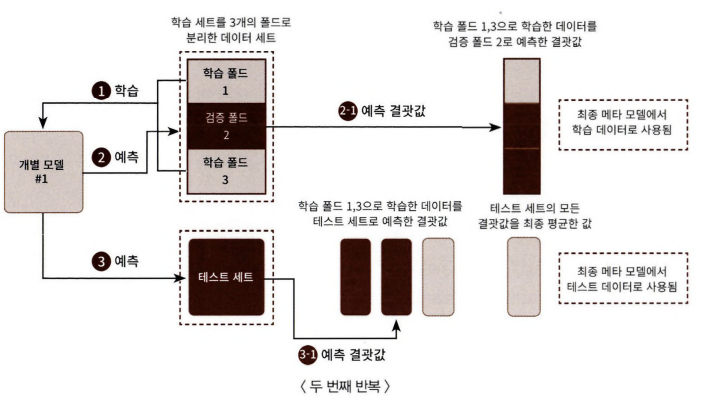

- 학습용 데이터(X_train)를 3개의 폴드(Fold)로 나눔. 그 중 2개의 폴드는 학습을 위한 데이터 폴드로, 나머지 1개의 폴드는 검증을 위한 데이터 폴드로 나눔.
- 두 개의 폴드로 나뉜 학습 데이터를 기반으로 개별 모델을 학습시키고, 이렇게 학습된 개별 모델은 검증 폴드 1개 데이터로 예측하고 그 결과를 저장. 이렇게 만들어진 예측 데이터는 메타 모델을 학습시키는 '학습 데이터(cv_train)'로 사용됨.
- 반면, 두 개의 학습 폴드 데이터로 학습된 개별 모델은 원본 테스트 데이터(X_test)를 예측하여 예측값을 생성함. 이러한 로직을 3번 반복하면서 이 예측값의 평균으로 최종 결괏값을 생성하고 이를 메타 모델을 위한 '테스트 데이터(cv_test)'로 사용함.
- 이 과정을 cv=3번 반복하여 메타 모델에 사용될 학습 데이터(cv_train)와 테스트 데이터(cv_test)를 만듦.

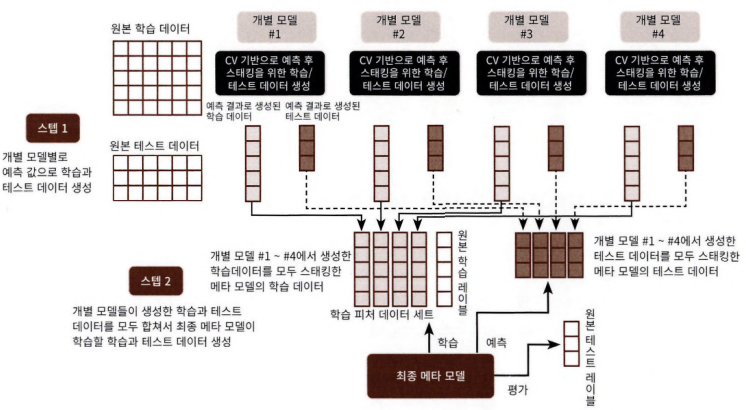

- 메타 모델이 사용할 '최종 학습 데이터(cv_train)'와 '원본 데이터의 레이블 데이터(y_train)'
를 합쳐서 메타 모델을 학습한 후에,

   '최종 테스트 데이터(cv_test)'로 예측을 수행한 뒤,
   
   최종 예측 결과를 '원본 테스트 데이터의 레이블 데이터(y_test)'와 비교해 평가.

In [32]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_absolute_error

# 개별 기반 모델에서 최종 모타 모델이 사용할 학습 및 테스트용 데이터를 생성하기 위한 함수
def get_stacking_base_datasets(model, X_train_n, y_train_n, X_test_n, n_folds):
  # 지정된 n_folds값으로 KFold 생성.
  kf = KFold(n_splits=n_folds, shuffle=False)
  # 추후에 메타 모델이 사용할 학습 데이터 반환을 위한 넘파이 배열 초기화
  train_fold_pred = np.zeros((X_train_n.shape[0], 1))
  test_pred = np.zeros((X_test.shape[0], n_folds))
  print(model.__class__.__name__, 'model 시작')

  for folder_counter, (train_index, valid_index) in enumerate(kf.split(X_train_n)):
    # 입력된 학습 데이터에서 기반 모델이 학습/예측할 폴드 데이터 세트 추출
    print('\t 폴드 세트: ', folder_counter, ' 시작 ')
    X_tr = X_train_n[train_index]
    y_tr = y_train_n[train_index]
    X_te = X_train_n[valid_index]

    # 폴드 세트 내부에서 다시 만들어진 학습 데이터로 기반 모델의 학습 수행.
    model.fit(X_tr, y_tr)
    # 폴드 세트 내부에서 다시 만들어진 검증 데이터로 기반 모델 예측 후 데이터 저장.
    train_fold_pred[valid_index, :] = model.predict(X_te).reshape(-1,1)
    # 입력된 원본 테스트 데이터를 폴드 세트 내 학습된 기반 모델에서 예측 후 데이터 저장.
    test_pred[:, folder_counter] = model.predict(X_test_n)

  # 폴드 세트 내에서 원본 테스트 데이터를 예측한 데이터를 평균하여 테스트 데이터로 생성
  test_pred_mean = np.mean(test_pred, axis=1).reshape(-1, 1)

  # train_fold_pred는 최종 메타 모델이 사용하는 학습 데이터, test_pred_mean은 테스트 데이터
  return train_fold_pred, test_pred_mean


In [33]:
knn_train, knn_test = get_stacking_base_datasets(knn_clf, X_train, y_train, X_test, 7)
rf_train, rf_test = get_stacking_base_datasets(rf_clf, X_train, y_train, X_test, 7)
dt_train, dt_test = get_stacking_base_datasets(dt_clf, X_train, y_train, X_test, 7)
ada_train, ada_test = get_stacking_base_datasets(ada_clf, X_train, y_train, X_test, 7)

KNeighborsClassifier model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
RandomForestClassifier model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
DecisionTreeClassifier model 시작
	 폴드 세트:  0  시작 
	 폴드 세트:  1  시작 
	 폴드 세트:  2  시작 
	 폴드 세트:  3  시작 
	 폴드 세트:  4  시작 
	 폴드 세트:  5  시작 
	 폴드 세트:  6  시작 
AdaBoostClassifier model 시작
	 폴드 세트:  0  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  1  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  2  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  3  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  4  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  5  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


	 폴드 세트:  6  시작 


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


In [34]:
# concatenate()는 여러개의 넘파일 배열을 칼럼 또는 로우 레벨로 합쳐주는 함수
Stack_final_X_train = np.concatenate((knn_train, rf_train, dt_train, ada_train), axis=1)
Stack_final_X_test = np.concatenate((knn_test, rf_test, dt_test, ada_test), axis=1)
print('원본 학습 피처 데이터 Shape:', X_train.shape, '원본 테스트 피처 Shape:', X_test.shape)
print('스태킹 학습 피처 데이터 Shape:', Stack_final_X_train.shape, '스태킹 테스트 피처 데이터 Shape:', Stack_final_X_test.shape)

원본 학습 피처 데이터 Shape: (455, 30) 원본 테스트 피처 Shape: (114, 30)
스태킹 학습 피처 데이터 Shape: (455, 4) 스태킹 테스트 피처 데이터 Shape: (114, 4)


스태킹 학습 피처 데이터는 원본 학습 피처 데이터와 로우(Row) 크기는 같고, 4개의 개별 모델 예측값을 합친 것이므로 칼럼(Column) 크기는 4.

In [35]:
lr_final.fit(Stack_final_X_train, y_train)
stack_final = lr_final.predict(Stack_final_X_test)

print('최종 메타 모델의 예측 정확도: {0:.4f}'.format(accuracy_score(stack_final, y_test)))

최종 메타 모델의 예측 정확도: 0.9737
